In [2]:
#import required Libraries for clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
retail = pd.read_csv('OnlineRetail.csv', sep=",",encoding="ISO-8859-1",header=0)


In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
#shape of DF
retail.shape

(541909, 8)

In [6]:
# df info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Data Cleaning**

In [7]:
# Calculating the missing values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,24.93
Country,0.00


In [8]:
# droping rows having missing values
retail = retail.dropna()
retail.shape

(406829, 8)

In [9]:
# changing the datatype od customer ID
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [10]:
# New Attribute : Monetory

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [17]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.column = ['CustomerID', 'Frrequency']
rfm_f.head()

/tmp/ipython-input-1561195485.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  rfm_f.column = ['CustomerID', 'Frrequency']


,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
# merging the Two DFs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
# New Attribut : Recency

# Convert to datetime to proper datatype
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],infer_datetime_format=True)
retail['InvoiceDate']

/tmp/ipython-input-2123152977.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],infer_datetime_format=True)


,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [29]:
# campute the maximum date to know the last transaction date
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [30]:
# calculate the difference
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [31]:
# caompute recency of customer
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [32]:
#Extract Number of days only (Round Figure)
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [35]:
# Merge the dataframes to get the final RFM dataframe

# Re-create rfm by merging monetary and frequency data
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')

# Merge with recency data
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')

# Rename the columns to final RFM attributes
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


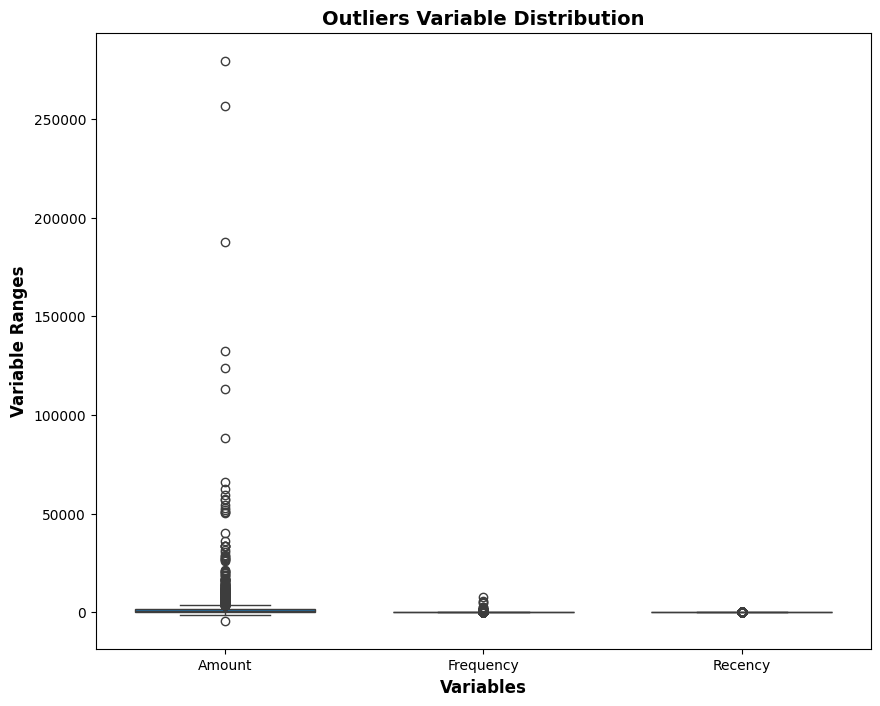

In [36]:
# outlier Analysis of Amount frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v",whis=1.5,saturation=1,width=0.7)
plt.title('Outliers Variable Distribution', fontsize = 14, fontweight = 'bold')
plt.ylabel('Variable Ranges', fontsize = 12, fontweight = 'bold')
plt.xlabel('Variables', fontsize = 12, fontweight = 'bold')
plt.show()

In [37]:
# removing outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# removing outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# removing outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

**Scaling Features**

In [39]:
scaler = StandardScaler()

In [44]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

#fit transform
rfm_df = scaler.fit_transform(rfm_df)
rfm_df.shape

(4293, 3)

In [45]:
rfm_df = pd.DataFrame(rfm_df)
rfm_df.columns = ['Amount', 'Frequency', 'Recency']
rfm_df.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


**Model Building**

In [46]:
# K-Means with some Arbitrary

kmeans =KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df)

KMeans(max_iter=50, n_clusters=4)

In [48]:
kmeans.labels_

array([0, 3, 2, ..., 0, 2, 2], dtype=int32)

In [49]:
set(kmeans.labels_)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

**Elbow Curve to get the right number of Clusters**

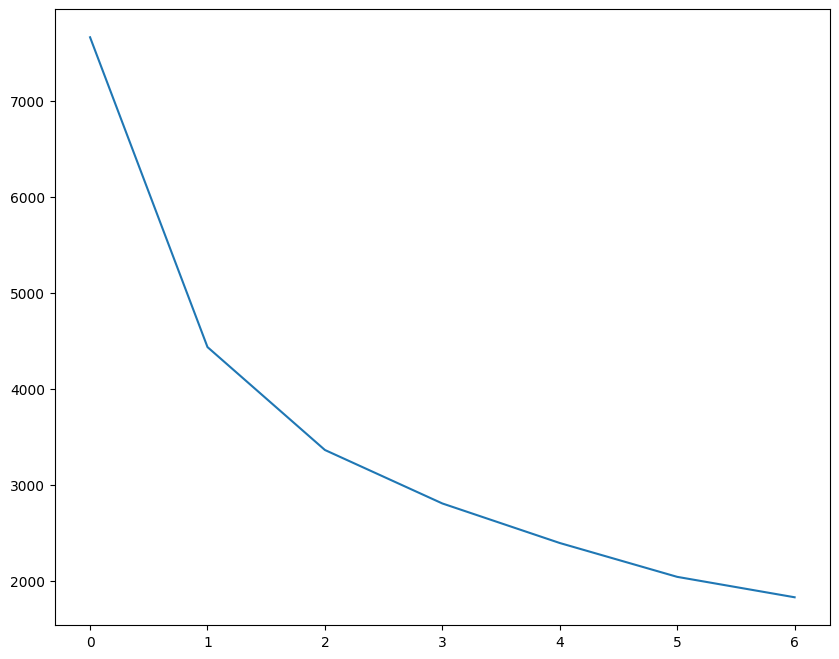

In [51]:
std=[]
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(rfm_df)
  std.append(kmeans.inertia_)
plt.plot(std)

In [53]:
# final Model with n = 3
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(rfm_df)

KMeans(n_clusters=3)

In [56]:
 # Define filename for pickle file
import pickle
filename = 'kmeans_model.pkl'

# open file in write mode
with open('kmeans_saved_model','wb') as file:
  pickle.dump(kmeans, file)

file.close()

pickle.dump(kmeans, open('kmean_model.pkl','wb'))